# `plot_contour_labels`

This notebook is a simple example of the GeoCAT-viz function <a href="../user_api/generated/geocat.viz.util.plot_contour_labels.html#geocat-viz.util.plot_contour_labels">plot_contour_labels</a>.

In [2]:
# Import packages:

import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import numpy as np

import geocat.datafiles as gdf
import geocat.viz as gv

In [3]:
# Read in data:

# Open a netCDF data file using xarray default engine and
# load the data into xarrays
ds = xr.open_dataset(gdf.get("netcdf_files/slp.1963.nc"), decode_times=False)

# Get data from the 24th timestep
pressure = ds.slp[24, :, :]

# Translate short values to float values
pressure = pressure.astype('float64')

# Convert Pa to hPa data
pressure = pressure * 0.01

# Fix the artifact of not-shown-data around 0 and 360-degree longitudes
wrap_pressure = gv.xr_add_cyclic_longitudes(pressure, "lon")

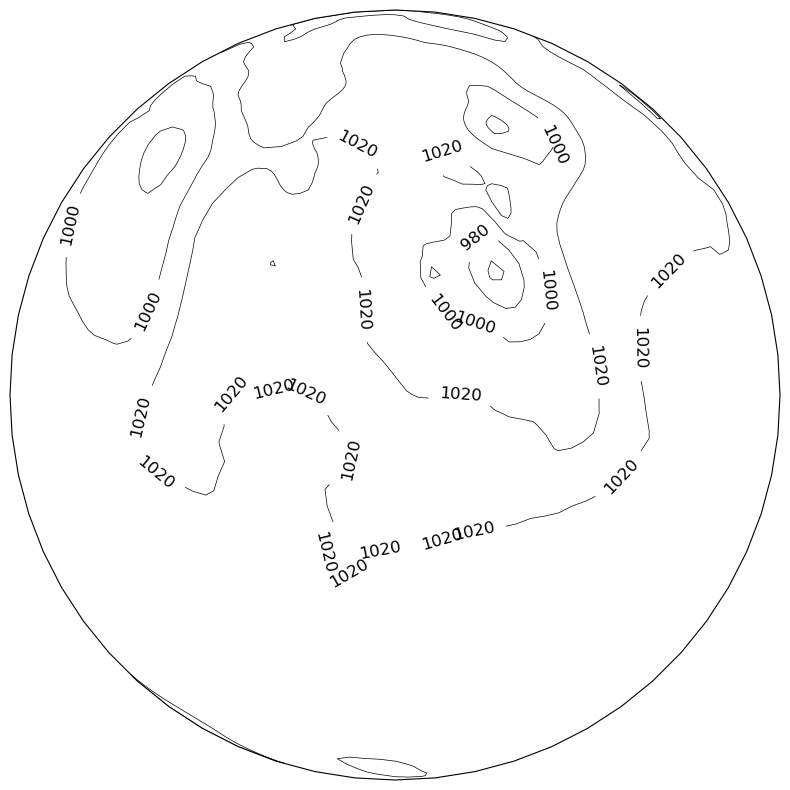

In [10]:
# Create plot

# Set figure size
fig = plt.figure(figsize=(8, 8))

# Set global axes with an orthographic projection
proj = ccrs.Orthographic(central_longitude=270, central_latitude=45)
ax = plt.axes(projection=proj)
ax.set_global()

# Plot contour data
p = wrap_pressure.plot.contour(ax=ax,
                               transform=ccrs.PlateCarree(),
                               linewidths=0.5,
                               cmap='black',
                               add_labels=False)

contour_label_locations = [(176.4, 34.63), (-150.46, 42.44), (-142.16, 28.5),
                        (-134.12, 16.32), (-108.9, 17.08), (-98.17, 15.6),
                        (-108.73, 42.19), (-111.25, 49.66), (-127.83, 41.93),
                        (-92.49, 25.64), (-77.29, 29.08), (-77.04, 16.42),
                        (-95.93, 57.59), (-156.05, 84.47), (-17.83, 82.52),
                        (-76.3, 41.99), (-48.89, 41.45), (-33.43, 37.55),
                        (-46.98, 17.17), (1.79, 63.67), (-58.78, 67.05),
                        (-44.78, 53.68), (-69.69, 53.71), (-78.02, 52.22),
                        (-16.91, 44.33), (-95.72, 35.17), (-102.69, 73.62)]

# Plot Clabels
gv.plot_contour_labels(ax,
                       p,
                       ccrs.Geodetic(),
                       proj,
                       clabel_locations=contour_label_locations)


# Make layout tight
plt.tight_layout()

plt.show();